# **Problem 1**

We start from the rejection sampling code provided by Dr. Perdikaris.  We'd like to compare the results of this code to that of importance sampling and an implementation of the Metropolis Algorithm.

In [ ]:
import numpy as np
import scipy.stats as st
from tqdm import trange
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def p(x):
        return st.norm.pdf(x, loc=30, scale=10) + st.norm.pdf(x, loc=80, scale=20)
    
def q(x):
    return st.norm.pdf(x, loc=50, scale=30)

Here we have the provided code for rejection sampling.  The advantage of using rejection sampling is that it offers a way to sample from a very simple proposal distribution according to a particular constant value.  However, as with most of the sampling techniques we have learned so far, this method tends to break down at higher dimensions of data, which can be disadvantageous in many scenarios.

In [ ]:
def rejection_sampling(iter=1000):
  
    samples = []

    for i in trange(iter):
        z = np.random.normal(50, 30)
        u = np.random.uniform(0, k*q(z))
        if u <= p(z):
            samples.append(z)

    return np.array(samples)

Here we have the code for importance sampling.  The advantage of using importance sampling, as opposed to other more vanilla sampling methods such as Monte-Carlo approximation, is the convergence.  The variance for Importance Samping is much smaller than simple Monte-Carlo approximation.  Despite this, it can be difficult to assess the accuracy of our estimator, which can be limiting.

In [ ]:
def importance_sampling(iter=1000):
  
  samples = []

  for i in trange(iter):
    sample = np.random.random();
    if (sample >= 0.5):
      z = np.random.normal(30, 10)
    else:
      z = np.random.normal(80, 20)
    samples.append(z)

  return np.array(samples)

Here we have the code for the Metropolis Algorithm.  The Metropolis Algorithm is a highly revered application of Markov Chains to Monte Carlo sampling techniques.  The advantage of the Metropolis Algorithm is that it allows us to sample from complex and high dimensional distributions.  One disadvantage of the Metropolis Algorithm can be that it may take many iterations to converge exactly to the correct distribution.

In [ ]:
def metropo(x0, iter=1000):

  xOld = x0
  samples = []

  for i in trange(iter):
    xNew = np.array([xOld]) + np.random.normal(size=1)
    rand = np.random.random()
    if (rand < p(xNew)/p(xOld)):
      xOld = xNew
    samples.append(xOld)

  return np.array(samples)

Now we can perform our sampling.

In [ ]:
x = np.arange(-50, 151)
k = max(p(x) / q(x))

x0 = p(30)

s_i = importance_sampling(iter=100000)

s_r = rejection_sampling(iter=100000)

s_m_unburnt = metropo(x0, iter=100000)
s_m = s_m_unburnt[1000:]

100%|██████████| 100000/100000 [01:27<00:00, 1142.28it/s]


And then we plot the distributions we are using for sampling.  This includes the distribution we'd like to sample, and the proposal distribution used for rejection sampling.

No handles with labels found to put in legend.


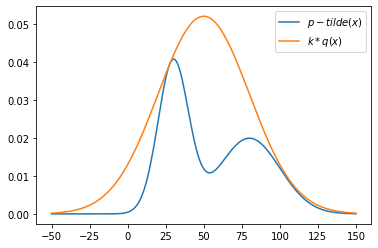

In [ ]:
plt.legend()
plt.plot(x, p(x), label = '$p-tilde(x)$')
plt.plot(x, k*q(x), label = '$k*q(x)$')
plt.legend()
plt.show()

As we see below, the importance sampling method produces a histogram which matches the general shape of our desired distribution.  This was achieved with only 20,000 samples.  We can also compute the mean and variance to validate the accuracy of this method of sampling.  The mean and standard deviation of the sampled data appears to be relatively similar to the proposal distribution, which is great!

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The mean of this sampled data:  55.073467367187526
The variance of this sampled data:  875.5257619733893
The standard deviation of this sampled data:  29.58928458029003


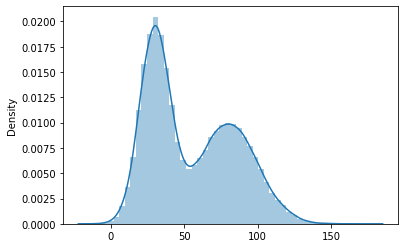

In [ ]:
sns.distplot(s_i)

# Mean

mean = np.sum(s_i) / s_i.size

print('The mean of this sampled data: ', mean)

# Variance

variance_array = np.empty(s_i.shape)

for i in range(0, len(s_i)):
  var = (s_i[i])**2
  variance_array[i] = var

variance = np.sum(variance_array) / variance_array.size - mean**2

print('The variance of this sampled data: ', variance)

print('The standard deviation of this sampled data: ', np.sqrt(variance))

Now, by showing the results of the given rejection sampling method, we see that the mean, standard deviation, and variance are all very similar to our try at importance sampling.  This is great because it confirms our results with a given method which correctly samples.  It should be noted that this result produces slightly larger variance/std, but a slightly smaller mean.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The mean of this sampled data:  55.1712851461606
The variance of this sampled data:  883.0258279636882
The standard deviation of this sampled data:  29.715750503120198


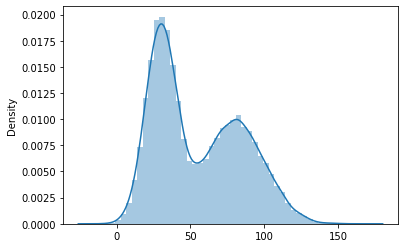

In [ ]:
sns.distplot(s_r)

# Mean

mean = np.sum(s_r) / s_r.size

print('The mean of this sampled data: ', mean)

# Variance

variance_array = np.empty(s_r.shape)

for i in range(0, len(s_r)):
  var = (s_r[i])**2
  variance_array[i] = var

variance = np.sum(variance_array) / variance_array.size - mean**2

print('The variance of this sampled data: ', variance)

print('The standard deviation of this sampled data: ', np.sqrt(variance))

Finally, we present the results of our run of the metropolis algorithm.  The mean, standard deviation, and variance are again fairly similar to the distribution we desired. The standard deviation and variance are smaller by a more significant margin than the previous sampling methods.  Looking at the histogram of our samples, we see that the shape is slightly more irregular than the previous two methods, but this is due to the fact that we use a highly generalized approach which requires more data, but whose accuracy is much more powerful in high dimensions of data.  It definitely makes sense that this distribution would require much more iterations in order to converge on the desired distribution.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The mean of this sampled data:  56.58102599632374
The variance of this sampled data:  818.7674416469508
The standard deviation of this sampled data:  28.61411263077978


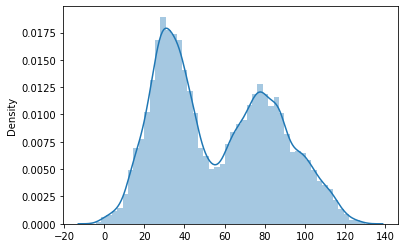

In [ ]:
sns.distplot(s_m)

# Mean

mean = np.sum(s_m) / s_m.size

print('The mean of this sampled data: ', mean)

# Variance

variance_array = np.empty(s_m.shape)

for i in range(0, len(s_m)):
  var = (s_m[i])**2
  variance_array[i] = var

variance = np.sum(variance_array) / variance_array.size - mean**2

print('The variance of this sampled data: ', variance)

print('The standard deviation of this sampled data: ', np.sqrt(variance))

Here we show all three histograms for the sampling techniques.  As we can see, they are all fairly similar.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

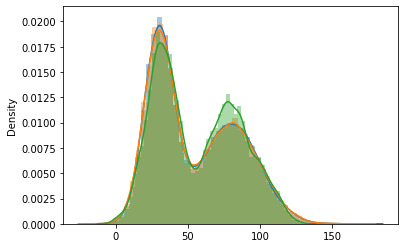

In [ ]:
sns.distplot(s_i)
sns.distplot(s_r)
sns.distplot(s_m)

For thoroughness, we also use the Metropolis Algorithm on 200,000 iterations to test if the output samples are approaching the true distribution with increasing N.

100%|██████████| 200000/200000 [03:01<00:00, 1099.26it/s]
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The mean of this sampled data:  47.198010094497405
The variance of this sampled data:  625.9472379535337
The standard deviation of this sampled data:  25.01893758642708


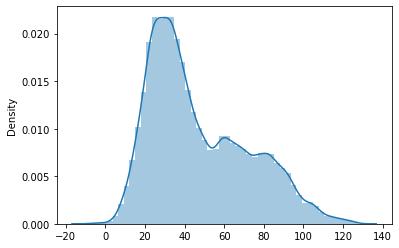

In [ ]:
s_m_unburnt_long = metropo(x0, 200000)
s_m_long = s_m_unburnt_long[1000:]

sns.distplot(s_m_long)

# Mean

mean = np.sum(s_m_long) / s_m_long.size

print('The mean of this sampled data: ', mean)

# Variance

variance_array = np.empty(s_m_long.shape)

for i in range(0, len(s_m_long)):
  var = (s_m_long[i])**2
  variance_array[i] = var

variance = np.sum(variance_array) / variance_array.size - mean**2

print('The variance of this sampled data: ', variance)

print('The standard deviation of this sampled data: ', np.sqrt(variance))

# **Problem 2**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

First, we define functions which we can use to update our parameters.  We require updates for $w_0$ (corresponds to $\beta_0$), $w_1$ (corresponds to $\beta_1$), and $\gamma$.  We need to implement the update rules derived in part a.

In [2]:
# First define the sampling function for each parameter

# For w_0
def sample_w_0(y, x, w_1, gamma, mu_0, gamma_0):

  n = len(x)
  var = (gamma_0 + n*gamma)**(-1)
  a = mu_0*gamma_0
  sum = 0

  for i in range(0, n):
    sum += (y[i] - w_1*x[i])
  
  mean = (a + gamma*sum)*var
  posterior = np.random.normal(mean, np.sqrt(var), size=1)
  return posterior

# For w_1
def sample_w_1(y, x, w_0, gamma, mu_1, gamma_1):

  n = len(x)

  sum1 = 0
  sum2 = 0
  for i in range(0, n):
    sum1 += x[i]**2
    sum2 += x[i]*(y[i] - w_0)

  var = (gamma_1 + gamma*sum1)**(-1)
  mean = (gamma*sum2)*var
  posterior = np.random.normal(mean, np.sqrt(var), size=1)
  return posterior

# For gamma
def sample_gamma(y, x, w_0, w_1, alpha, beta):

  n = len(x)

  mean = alpha + n/2

  sum = 0
  for i in range(0, n):
    sum += (y[i] - w_0 - w_1*x[i])**2
  
  var = beta + sum/2
  posterior = np.random.gamma(mean, np.sqrt(var**(-1)), size=1)
  return posterior


Now, we can generate the Dataset and initialize the parameters desired.  This means that we can plot our distributions according to the baseline parameters.

Text(0, 0.5, 'y')

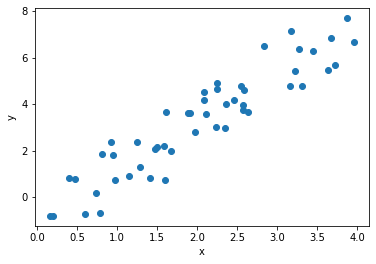

In [3]:
# Create the dataset 

w_0_baseline = -1
w_1_baseline = 2
gamma_baseline = 1

N = 50
x = np.random.uniform(low = 0, high = 4, size = N)
y = np.random.normal(w_0_baseline + w_1_baseline * x, 1 / np.sqrt(gamma_baseline))

synth_plot = plt.plot(x, y, "o")
plt.xlabel("x")
plt.ylabel("y")

Now we assign the initial values for both our hyperparameters and our parameters.

In [4]:
# Initial values
init = {"w_0": 0,
        "w_1": 0,
        "gamma": 2}

# Hyper parameters
hypers = {"mu_0": 0,
         "gamma_0": 1,
         "mu_1": 0,
         "gamma_1": 1,
         "alpha": 2,
         "beta": 1}

We use the Gibbs Sampler outline provided to us by George.

In [5]:
def gibbs(y, x, iters, init, hypers):
    w_0 = init["w_0"]
    w_1 = init["w_1"]
    gamma = init["gamma"]
    
    trace = np.zeros((iters, 3)) # Store values of w_0, w_1, gamma
    
    for it in range(iters):
        w_0 = sample_w_0(y, x, w_1, gamma, hypers["mu_0"], hypers["gamma_0"])
        w_1 = sample_w_1(y, x, w_0, gamma, hypers["mu_1"], hypers["gamma_1"])
        gamma = sample_gamma(y, x, w_0, w_1, hypers["alpha"], hypers["beta"])
        trace[it,0] = w_0
        trace[it,1] = w_1
        trace[it,2] = gamma
        
    trace = pd.DataFrame(trace)
    trace.columns = ['w_0', 'w_1', 'gamma']
        
    return trace

Now we run our Gibbs Sampler on the dataset we generated for 1,000 iterations.  We start with what we initially set to be our parameters and hyperparameters.

In [6]:
iters = 1000
trace = gibbs(y, x, iters, init, hypers)

We plot the trace ($w_0$, $w_1$, and $\gamma$) over time (the number of iterations).  As we see below, $w_0$ seems to quickly converge to values near what we desired.  $w_0$ quickly converged to about -1, which is exactly what we designated to be $w_0$ in our baseline.  $w_1$ quickly converges to values near 2, which again is exactly what we designated to be $w_1$ in our baseline.  $\gamma$ seems to have a much more erratic behavior, however gamma is important in updating $w_0$ and $w_1$, so if these two parameters are converging to the correct values, then our $\gamma$ must also be correct!

Text(0, 0.5, 'Parameter values')

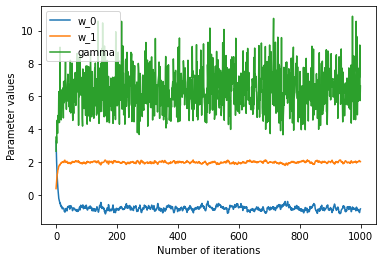

In [7]:
traceplot = trace.plot()
traceplot.set_xlabel("Number of iterations")
traceplot.set_ylabel("Parameter values")

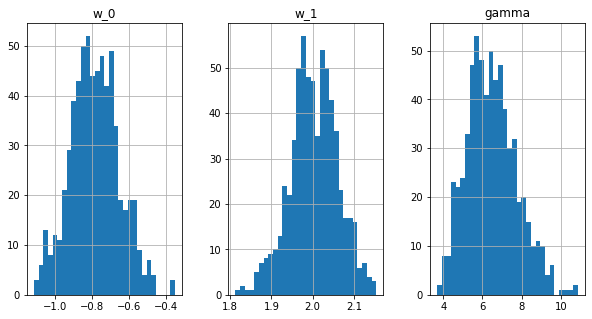

In [8]:
# Burn some samples because the algorithm is not yet converged. 

burn_low = 350
burn_high = 1000

tr = trace[burn_low:burn_high]

hist_plot = tr.hist(bins = 30, layout = (1,3), figsize=(10, 5))

The parameters after 10,000 runs of Gibb's sampling
w_0 =  -0.8252740764790715
w_1 =  2.0424644420474585
gamma =  6.632661321120338


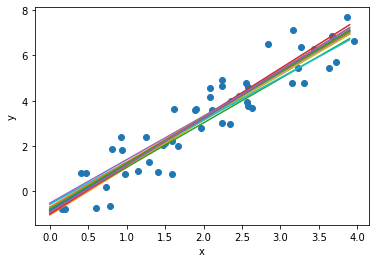

In [9]:
plt.figure()
synth_plot = plt.plot(x, y, "o")
plt.xlabel("x")
plt.ylabel("y")

x_pred = np.arange(0, 4, 0.1)

for i in range(0, len(tr), 50):
  y_pred = []
  for j in range(0, len(x_pred)):
    y_pred.append(tr.iat[i, 0] + tr.iat[i, 1]*x_pred[j])
  plt.plot(x_pred, np.array(y_pred))

print("The parameters after 10,000 runs of Gibb's sampling")
print("w_0 = ", tr.iat[649,0])
print("w_1 = ", tr.iat[649,1])
print("gamma = ", tr.iat[649,2])
plt.plot(x_pred, np.array(y_pred))


One advantage of Gibbs sampling over the Metropolis Algorithm is that it may take fewer iterations to converge to the correct distribution.  It should also be noted that the Gibbs Sampler samples from a conditional distribution, rather than a joint density, which can be more complicated to sample from.